In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets
import numpy as np
import tensorflow as tf

In [3]:
cancer = datasets.load_breast_cancer()

In [4]:
len(cancer.feature_names)

30

In [5]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

In [6]:
cancer.target[100:110]

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [7]:
cancer.data.shape, cancer.target.shape

((569, 30), (569,))

In [8]:
x = cancer.data.astype('float32')
y = cancer.target.astype('float32').reshape(569, 1)

In [9]:
x.shape, y.shape

((569, 30), (569, 1))

In [10]:
W = tf.Variable(tf.zeros([30, 1]))
b = tf.Variable(tf.zeros([1]))
y_hat = tf.matmul(x, W) + b

In [11]:
loss = tf.losses.sigmoid_cross_entropy(y, y_hat)
optimizer = tf.train.GradientDescentOptimizer(0.00001)
train = optimizer.minimize(loss)

In [12]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [13]:
costs = []
for step in range(5000):
    _, c = sess.run([train, loss])
    costs.append(c)

In [14]:
prediction = sess.run(tf.sigmoid(y_hat))
accuracy = (prediction > 0.5) == y

In [15]:
np.sum(accuracy)/len(y)

0.92442882249560632

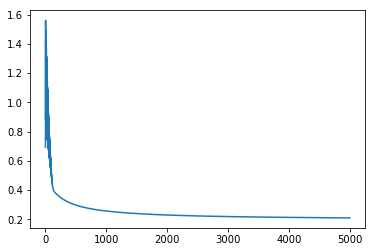

In [16]:
plt.plot(costs)